# Project 2: Principal Component Analysis

By: Ammar Malik, Cooper Coons, Nour Mihamou, Ronnie Devernoe



**Abstract**

The following project analyzes data from video game sales starting at the date of their release to 2017. To dissect this dataset, the data was cleaned and resized to only include columns that hold sales numbers. Afterwards, a Principle Component Analysis was done on the cleaned data, and our team was able to decide on the use of only two components to show which gaming platform held the highest sales. We were able to conclude through our Principle Component Analysis and K-Means analysis that the gaming platform that performed the best in sales worldwide was PlayStation 3. Wii gaming platform definitely comes close with the most sales, but this does not automatically mke it the best console sold. Furthermore, we found that the region that contributed to the most sales was North America.

**Introduction**

The data analyzed for this project contains the sales of videogames from their release date, as early as 1980 with Atari 2600 to 2017 with PlayStation Vita. The data consists of  platforms, PlayStation 4, PlayStation 3, GameBoy, etc, and different regional sales. These regions include the United States, European Union, and the total sales, found under the "Global_Sales" column. The implementation of Principle Component Analysis (PCA) to this data reduces the dimensionality of the data, and an analysis will be done to determine the best number of components. The following project determines the best number of components to represent the most variance, in order to determine and achieve high sale figures.


**Methods**

The dataset is called videogame sales and contains the name of the game, the year it was published, the genre, the publisher and sales figures in different regions plus sales globally. In order to compute and run Principle Component Analysis, we need numerical values, we begin by removing the string columns like Name and Platform. We only want to look at the Year and sales figures.

After filtering to year and sales figures, we standarized the data and ran the PCA function through skLearn, a package in python that contains the PCA algorithm. Afterwards, we re-added our Platform column from our cleaned data dataset. We generated a scatter plot based on principle component #1 and #2 and used color coding to seperate each according to their corresponding platform. This graph may be viewed below, titled "2 Component PCA".

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr

from google.colab import files 
uploaded = files.upload()

data = pd.read_csv("vgsales.csv") #reads the content of the file into a pandas dataframe called "data"
data.head()

Saving vgsales.csv to vgsales.csv


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
from sklearn.preprocessing import StandardScaler

numericValues = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
platform = ['Platform']

myCleanData = data.head(1000).dropna()

pcaData = myCleanData.loc[:,numericValues]

pcaData = StandardScaler().fit_transform(pcaData)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(pcaData)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2'])

In [ ]:
finalDf = pd.concat([principalDf, myCleanData[['Platform']]], axis = 1)

finalDf = finalDf.dropna()
print(finalDf)

          PC 1      PC 2 Platform
0    30.053656 -3.208902      Wii
1    11.577711  6.052057      NES
2    12.188723 -0.597528      Wii
3    10.941661 -0.619748      Wii
4    10.050363  5.135009       GB
..         ...       ...      ...
985  -0.957147  0.123154       XB
986  -0.891642 -1.093452      PS3
987  -0.933526 -0.949327       GB
988  -1.053203 -0.281888       PS
989  -0.983949 -1.215355      PS2

[980 rows x 3 columns]


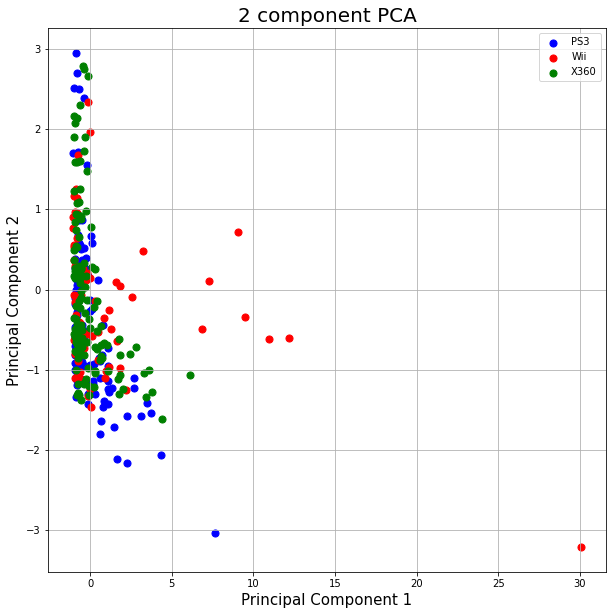

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
platforms = ['PS3', 'Wii', 'X360']
colors = ['b', 'r', 'g',]

for platform, color in zip(platforms,colors):
    indicesToKeep = finalDf['Platform'] == platform
    ax.scatter(finalDf.loc[indicesToKeep, 'PC 1']
               , finalDf.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
ax.legend(platforms)
ax.grid()

In [ ]:
from sklearn import preprocessing
import pandas as pd
import sklearn.decomposition as skld
scaler = preprocessing.MinMaxScaler()
myNormedX = scaler.fit_transform(pcaData)
myPCA2 = skld.PCA(n_components=2)
myFit2=myPCA2.fit(myNormedX)
myFit=pca.fit(pcaData)
myTransform2 = myFit.transform(myNormedX)

Text(0.5, 1.0, 'Plot 2: Scaled Data')

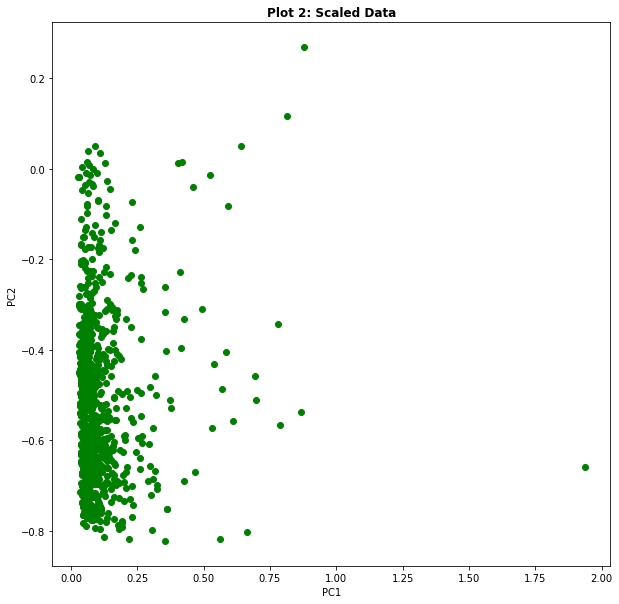

In [ ]:
arbitraryEntries=np.array([52,3,114,700])

fig=plt.figure(figsize = (10,10))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
for j in range(0,980):
  #if myTransform[[j],[1]]>5000 :
  #  print("bigger than 5k: ", j)
  #if myTransform[[j],[1]]>3000 :
  #  print("bigger than 3k: ", j)
  ax.scatter(myTransform2[[j],[0]],myTransform2[[j],[1]],c='g')

#for index in arbitraryEntries:
  #ax.scatter(myTransform2[[index],[0]],myTransform2[[index],[1]],c='r')
  #ax.annotate(myCleanData.iloc[index,0], (myTransform2[[index],[0]],myTransform2[[index],[1]]))

#plt.legend()
#plt.xlim([-2, 2])
#plt.ylim([-2, 2])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Plot 2: Scaled Data', fontweight='bold')

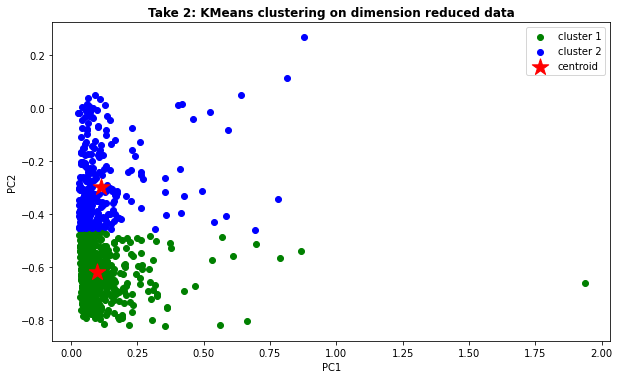

In [ ]:
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

km = KMeans(n_clusters=2, max_iter=100)
km.fit(myTransform2)

import matplotlib.pyplot as plt
from matplotlib.image import imread

centroids = km.cluster_centers_


# Plot the clustered data
fig, ax = plt.subplots(figsize=(10, 10))

plt.scatter(myTransform2[km.labels_ == 0, 0], myTransform2[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(myTransform2[km.labels_ == 1, 0], myTransform2[km.labels_ == 1, 1],
            c='blue', label='cluster 2')


'''
plt.scatter(myTransform[km.labels_ == 2, 0], myTransform[km.labels_ == 2, 1],
            c='yellow', label='cluster 3')


plt.scatter(myTransform[km.labels_ == 3, 0], myTransform[km.labels_ == 3, 1],
            c='black', label='cluster 4')
'''

plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
#plt.xlim([-2, 2])
#plt.ylim([-2, 2])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Take 2: KMeans clustering on dimension reduced data', fontweight='bold')


ax.set_aspect('equal');

**Analysis of Clusters**

In [ ]:
cluster1Data=  myCleanData.iloc[km.labels_ == 0,0:13]
numberToShow=min(cluster1Data.shape[0],20)
cluster1Data.head(numberToShow)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81


In [ ]:
cluster2Data=  myCleanData.iloc[km.labels_ == 1,0:13]
numberToShow=min(cluster2Data.shape[0],20)
cluster2Data.head(numberToShow)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
11,12,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
18,19,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61
19,20,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22


In [ ]:
from sklearn.cluster import KMeans, SpectralClustering

NAsalesFigures = ['NA_Sales', 'Global_Sales']

kMeansData = myCleanData.loc[:,NAsalesFigures]

km = KMeans(n_clusters=3, max_iter=100, n_init=10)
y_Pred = km.fit_predict(kMeansData)

In [ ]:
kMeansData['cluster'] = y_Pred

print(kMeansData)

     NA_Sales  Global_Sales  cluster
0       41.49         82.74        1
1       29.08         40.24        1
2       15.85         35.82        1
3       15.75         33.00        1
4       11.27         31.37        1
..        ...           ...      ...
995      0.86          1.76        0
996      0.72          1.76        0
997      0.68          1.76        0
998      1.26          1.76        0
999      1.11          1.76        0

[990 rows x 3 columns]


Text(0.5, 1.0, 'K-Means of Sales Figures in NA compared to Global Sales')

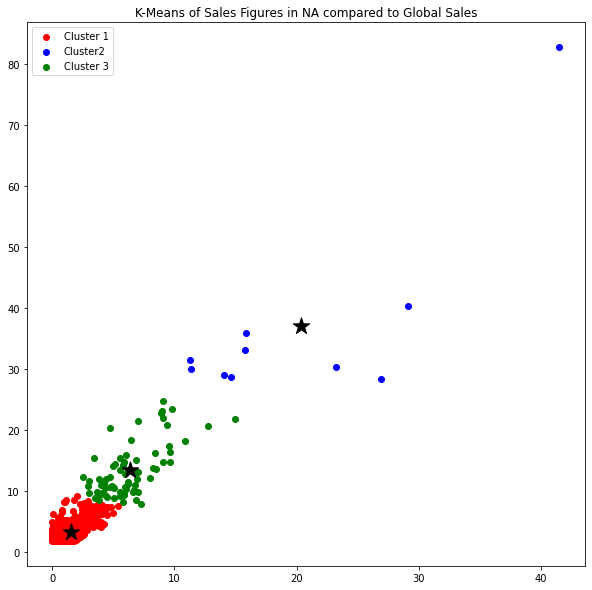

In [ ]:
new1 = kMeansData[kMeansData.cluster == 0]
new2 = kMeansData[kMeansData.cluster == 1]
new3 = kMeansData[kMeansData.cluster == 2]
#print(km.cluster_centers_)
#print(new1)
plt.figure(figsize=(10, 10))
plt.scatter( new1.NA_Sales, new1.Global_Sales , color = 'red', label = 'Cluster 1')
plt.scatter( new2.NA_Sales, new2.Global_Sales, color = 'blue', label = 'Cluster2')
plt.scatter( new3.NA_Sales, new3.Global_Sales, color = 'green', label = 'Cluster 3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker ='*', s = 300, color = 'black')
plt.legend()
plt.title("K-Means of Sales Figures in NA compared to Global Sales")

**5. Results**

We implemented PCA for three platforms; PS3, Wii and Xbox 360. We can see most of the sales of these three are united in cluster from below 0 to 5, however there are many outliers in the "2 Component PCA" graph. If we inspect the colored points we can see that the Wii has had more sales than Xbox and PS3 but does not make it the best selling console. The points outside but near the main cluster we see are blue which belong to the PS3 making it the console with the most sales. In our K-Means graph ("K-Means of Sales Figures in NA compared to Global Sales"), we compared the sales of North America aganist global sales and see the third cluster have the least amount of points whilst the red has the most, showcasing that most of Global Sales come from NA region.

We did not consider that the platforms may share some games and such, it makes it difficult to decide and generalize results on which platform performed best. Secondly, not consdering these sales may contribute to upgraded versions of platforms like the PS4. A more in depth analysis and many more graphs would be required in order to better understand these figures. 



**6. Appendix:** 

https://www.kaggle.com/gregorut/videogamesales

https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60